# Polygons

### Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from decimal import *
from results import solved_values

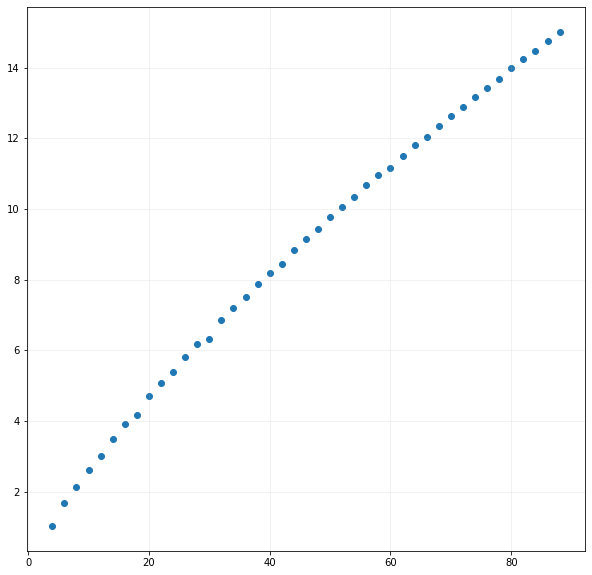

In [2]:
a,b = zip(*solved_values.items())

data = {
    'n': a,
    'paths': [Decimal(item) for item in b]
}

df = pd.DataFrame.from_dict(data)

# Analysis
df['ln_paths'] = df['paths'].apply(lambda x: x.ln())
df['ln_paths'] = df['ln_paths'].astype(np.float32)
df['cubert_ln_paths'] = np.cbrt(df['ln_paths'])

# Preparing final plot
df = df[['n', 'cubert_ln_paths']].copy()
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(axis='both', alpha=0.2)
ax.scatter(x=df.n, y=df.cubert_ln_paths)

### Debugging
#### Assertion errors
The following code below is used for debugging purposes when the assertion does not hold.

In [ ]:
all_points = sorted(list(solver.point_ls.keys()), key=operator.attrgetter('x', 'y'))

In [ ]:
def sliding_window_iter(iterable, size):
    # https://codereview.stackexchange.com/questions/239352/sliding-window-iteration-in-python
    iterables = itertools.tee(iter(iterable), size)
    window = zip(*(itertools.islice(t, n, None) for n,t in enumerate(iterables)))
    yield from window

In [ ]:
similar_points = set()
for item in tqdm(sliding_window_iter(all_points, 5), total=len(all_points)):
    for a,b in itertools.combinations(item,2):
        if abs(a.x - b.x) < TOLERANCE and abs(a.y - b.y) < TOLERANCE:
            similar_points.add((a,b))
similar_points = list(similar_points)

In [ ]:
similar_points

As the plot is close to linear, we think that the growth rate in $n$ (where $n$ is the number of sides of the polygon) is $e^{n^3}$.